In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/tcc_ceds_music.csv'  # Update with your file path
zs_music=pd.read_csv("/content/drive/MyDrive/tcc_ceds_music.csv")
zs_music['lyrics'] = zs_music['lyrics'].fillna('')

In [6]:
vtf = TfidfVectorizer(stop_words='english')
music_vector_matrix = vtf.fit_transform(zs_music['lyrics'])

In [7]:
def compute_cosine_similarity_in_batches(matrix, batch_size=1000):
    n_samples = matrix.shape[0]
    cosine_similarities = np.zeros((n_samples, n_samples))

    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_similarities = linear_kernel(matrix[start:end], matrix)
        cosine_similarities[start:end] = batch_similarities

    return cosine_similarities


In [8]:
cos_similar = compute_cosine_similarity_in_batches(music_vector_matrix)


In [9]:
def music_recommendation(title, cos_similar=cos_similar):
    index = music_indices[title]
    similarity_score = list(enumerate(cos_similar[index]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    similarity_index = [i[0] for i in similarity_score[1:11]]  # Top 10 recommendations
    return zs_music['track_name'].iloc[similarity_index]


In [10]:
music_indices = pd.Series(zs_music.index, index=zs_music['track_name']).drop_duplicates()


In [11]:
print(music_recommendation('patricia'))


17230               there will never be another you
21607                                      follower
19819    and here we test our powers of observation
17734               there will never be another you
535                                         dreamer
10172                                 made in japan
16884                                   on the lips
13732                                 hidden charms
12865                             girl of my dreams
17942                     i'll see you in my dreams
Name: track_name, dtype: object


In [13]:
top_10_tracks = zs_music['track_name'].head(10)


In [16]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))

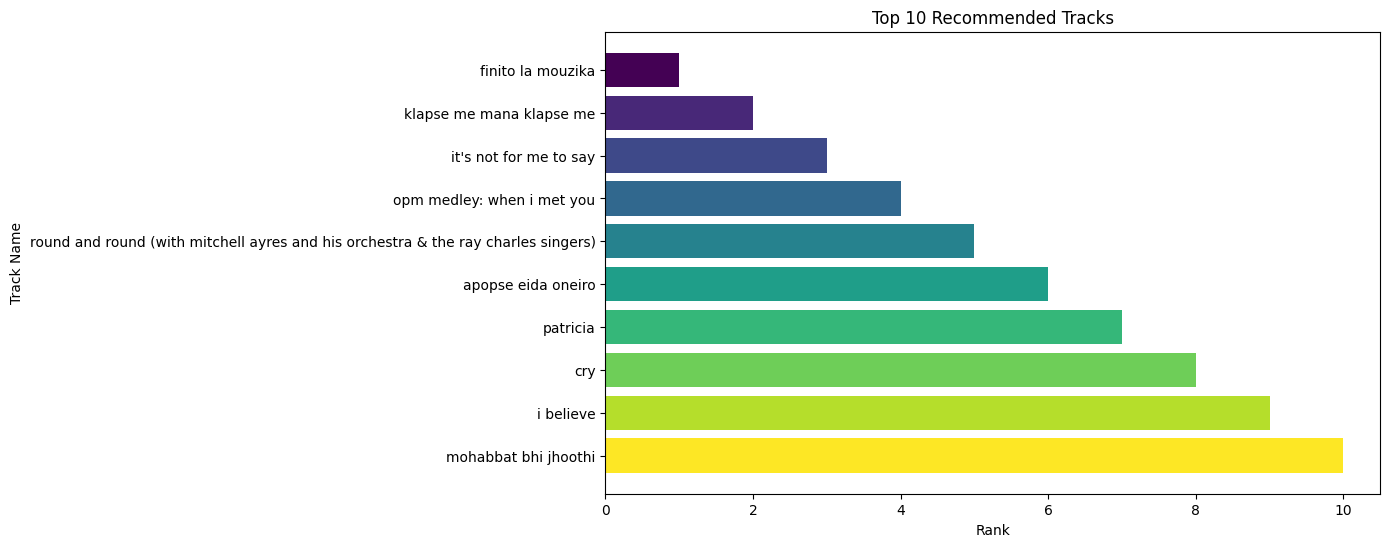

In [17]:
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_tracks[::-1], range(1, 11), color=colors)
plt.xlabel('Rank')
plt.ylabel('Track Name')
plt.title('Top 10 Recommended Tracks')
plt.gca().invert_yaxis()